# Fake News Classifier Using LSTM

Dataset: https://www.kaggle.com/c/fake-news/data#

In [1]:
# Importing  pandas for efficiently storing and manipulating large datasets
import pandas as pd 

In [2]:
# Reads data from a CSV file into a Pandas DataFrame. 
df= pd.read_csv("Datasets/datasets.csv")

In [3]:
# Function is used to display the first few rows of a Pandas DataFrame. By default
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
# Drop Nan Values
df=df.dropna()
print(df.head())

   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


In [5]:
# Get the Independent Features, drop label attribute from dataframe 'X'

X=df.drop('label',axis=1)

In [6]:
# Get the Dependent features
y=df['label']

In [7]:
# Typically represents the shape of a data array X
X.shape

(18285, 4)

In [8]:
# Typically represents the shape of the target variable or output 
y.shape

(18285,)

In [9]:
# Extensively provides neural network development,nlp tasks,time series analysis
import tensorflow as tf

In [10]:
# Install lastest version of tensorflow
!pip install tensorflow


In [11]:
tf.__version__

'2.15.0'

In [12]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [13]:
### Vocabulary size
voc_size=5000

### Onehot Representation 

In [14]:
# To convert categorical data into a format that can be effectively used by machine learning models, which typically require numerical input.

In [15]:
messages=X.copy()

In [16]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [17]:
messages.reset_index(inplace=True)

In [18]:
# Perform tasks such as tokenization, stemming, tagging, parsing, lemmatization

import nltk # standard library for nlp 
import re
from nltk.corpus import stopwords

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sabih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower() # to precise the corpus size
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [21]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [22]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[3115, 4455, 4415, 78, 511, 2185, 3012, 101, 94, 2610],
 [695, 1854, 4532, 4394, 4640, 4293, 2943],
 [3281, 3249, 258, 4362],
 [2315, 4886, 103, 2355, 3175, 4446],
 [3607, 4640, 2632, 2956, 1905, 408, 4640, 4963, 418, 1281],
 [3270,
  4281,
  2643,
  3571,
  4203,
  2076,
  1251,
  4844,
  2852,
  3276,
  1298,
  660,
  4797,
  1691,
  2943],
 [2997, 3850, 4990, 53, 3231, 4737, 3842, 4399, 1016, 2933, 4433],
 [3805, 4627, 2177, 313, 3009, 3280, 2076, 3419, 1016, 2933, 4433],
 [796, 1208, 3520, 1906, 258, 1707, 2588, 4068, 2076, 1997],
 [2242, 1818, 4651, 2220, 3674, 1132, 1624, 1403],
 [2045, 4417, 1818, 518, 2945, 3835, 2273, 3666, 3687, 3561, 3694],
 [2355, 1868, 511, 1707, 2076, 3009],
 [4172, 1254, 2798, 788, 1113, 829, 552, 4014, 1076],
 [2478, 1475, 1332, 2112, 2548, 3981, 1432, 1016, 2933, 4433],
 [2062, 4320, 1464, 4205, 608, 1016, 2933, 4433],
 [4948, 2453, 361, 3795, 3336, 1383, 2416, 1862, 4299, 2424],
 [487, 4650, 1854],
 [1980, 4597, 1760, 2863, 2076, 2611, 4730, 2943],
 

### Embedding Representation

In [23]:
# Padding is performed to fixed the size of each sentence
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  101   94 2610]
 [   0    0    0 ... 4640 4293 2943]
 [   0    0    0 ... 3249  258 4362]
 ...
 [   0    0    0 ... 1016 2933 4433]
 [   0    0    0 ... 2288 4097  630]
 [   0    0    0 ... 3001 2819  308]]


In [24]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3115,
       4455, 4415,   78,  511, 2185, 3012,  101,   94, 2610])

In [25]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [26]:
len(embedded_docs),y.shape

(18285, (18285,))

In [27]:
# Provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays

import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [28]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [29]:
# Splitting, Train_Test

from sklearn.model_selection import train_test_split # machine learning library
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)


### Model Training

### Performance Metrics And Accuracy

In [38]:
# Training the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
200/200 [==============================] - 5s 23ms/step - loss: 0.0760 - accuracy: 0.9728 - val_loss: 0.2398 - val_accuracy: 0.9180
Epoch 2/10
200/200 [==============================] - 5s 22ms/step - loss: 0.0526 - accuracy: 0.9821 - val_loss: 0.2772 - val_accuracy: 0.9136
Epoch 3/10
200/200 [==============================] - 5s 23ms/step - loss: 0.0301 - accuracy: 0.9909 - val_loss: 0.3042 - val_accuracy: 0.9162
Epoch 4/10
200/200 [==============================] - 5s 23ms/step - loss: 0.0183 - accuracy: 0.9948 - val_loss: 0.4048 - val_accuracy: 0.9154
Epoch 5/10
200/200 [==============================] - 5s 23ms/step - loss: 0.0164 - accuracy: 0.9944 - val_loss: 0.5208 - val_accuracy: 0.9087
Epoch 6/10
200/200 [==============================] - 5s 23ms/step - loss: 0.0095 - accuracy: 0.9975 - val_loss: 0.5088 - val_accuracy: 0.9041
Epoch 7/10
200/200 [==============================] - 5s 23ms/step - loss: 0.0070 - accuracy: 0.9983 - val_loss: 0.5524 - val_accuracy: 0.9109

In [40]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

172/172 [==============================] - 1s 6ms/step - loss: 0.6783 - accuracy: 0.9127
Test Loss: 0.6783, Test Accuracy: 0.9127


In [32]:
from sklearn.metrics import confusion_matrix

# Generate predictions on the test data
y_pred  = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

172/172 [==============================] - 2s 5ms/step


In [33]:
# Assuming you have the test labels in 'test_labels' and model predictions in 'test_predictions'
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[2831  276]
 [ 176 2203]]


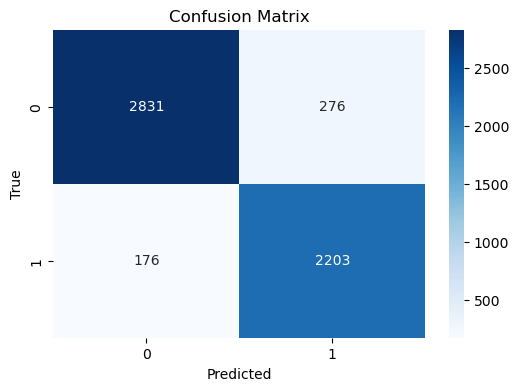

In [41]:
import seaborn as sns

# Define class labels
class_labels = ["0", "1"]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show();

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9176084578928181

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Calculate individual metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print overall metrics
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1-Score: {f1:.4f}")

Overall Accuracy: 0.9176
Overall Precision: 0.8887
Overall Recall: 0.9260
Overall F1-Score: 0.9070
